In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns

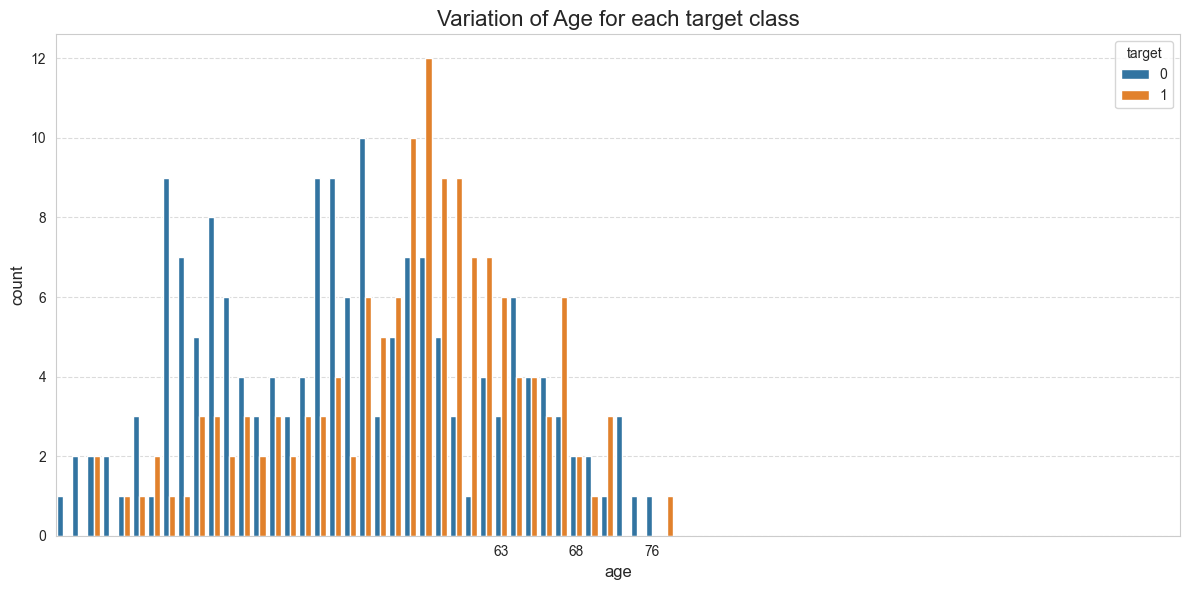

In [3]:
# Bai tap 1
df = pd.read_csv('cleveland.csv', header=None)
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol',
              'fbs', 'restecg', 'thalach', 'exang',
              'oldpeak', 'slope', 'ca', 'thal', 'target']
df['target'] = df.target.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})
df['thal'] = df.thal.fillna(df.thal.mean())
df['ca'] = df.ca.fillna(df.ca.mean())

# distribution of target vs age

plt.figure(figsize=(12, 6))

# Create a single countplot with hue for target
sns.countplot(data=df, x='age', hue='target', dodge=True,
              palette={0: '#1f77b4', 1: '#ff7f0e'})

plt.title('Variation of Age for each target class', fontsize=16)
plt.xlabel('age', fontsize=12)
plt.ylabel('count', fontsize=12)

# Adjust x-axis ticks
plt.xticks(range(29, 78, 5), rotation=0)

# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust legend
plt.legend(title='target', loc='upper right')

# Tight layout to prevent cutting off labels
plt.tight_layout()

plt.show()

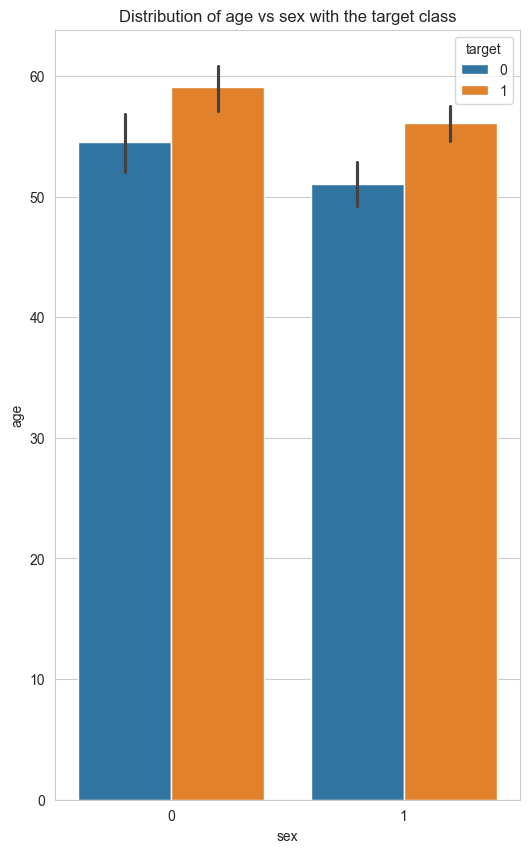

In [8]:
# bai tap 2
# barplot of age vs sex with hue = target
plt.figure(figsize=(6, 10))
sns.barplot(data=df, x='sex', y='age', hue='target', errorbar='ci')
plt.title('Distribution of age vs sex with the target class')
plt.xlabel('sex')
plt.ylabel('age')
plt.xticks([0, 1], ['0', '1'])
plt.legend(title='target')

plt.show()

In [9]:
# bai tap 3
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski')
knn.fit(X_train, y_train)
y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)
# Import confusion_matrix
from sklearn.metrics import confusion_matrix
cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)

print()
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)
print('Accuracy for training set for KNeighborsClassifier = {}'.format(accuracy_for_train))
print('Accuracy for test set for KNeighborsClassifier = {}'.format(accuracy_for_test))


Accuracy for training set for KNeighborsClassifier = 0.76
Accuracy for test set for KNeighborsClassifier = 0.69


In [10]:
# bai tap 4
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Import svm 
from sklearn.svm import SVC
svc = SVC(kernel='rbf', random_state=42)
svc.fit(X_train, y_train)
y_pred_train = svc.predict(X_train)
y_pred_test = svc.predict(X_test)
# Import confusion_matrix
from sklearn.metrics import confusion_matrix
cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)

print()
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)
print('Accuracy for training set for SVM = {}'.format(accuracy_for_train))
print('Accuracy for test set for SVM = {}'.format(accuracy_for_test))


Accuracy for training set for SVM = 0.66
Accuracy for test set for SVM = 0.67


In [13]:
# bai tap 5
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Import Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_train = nb.predict(X_train)
y_pred_test = nb.predict(X_test)
# Import confusion_matrix
from sklearn.metrics import confusion_matrix
cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)

print()
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)
print('Accuracy for training set for Naive Bayes = {}'.format(accuracy_for_train))
print('Accuracy for test set for Naive Bayes = {}'.format(accuracy_for_test))


Accuracy for training set for Naive Bayes = 0.85
Accuracy for test set for Naive Bayes = 0.84


In [14]:
# bai tap 6
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_split=2, random_state=42)
dtc.fit(X_train, y_train)
y_pred_train = dtc.predict(X_train)
y_pred_test = dtc.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)

print()
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)
print('Accuracy for training set for Decision Tree = {}'.format(accuracy_for_train))
print('Accuracy for test set for Decision Tree = {}'.format(accuracy_for_test))


Accuracy for training set for Decision Tree = 1.0
Accuracy for test set for Decision Tree = 0.75


In [15]:
# bai tap 7
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree
from sklearn.ensemble import RandomForestClassifier
dtc = RandomForestClassifier(criterion='gini', max_depth=10, min_samples_split=2, n_estimators = 10, random_state=42)
dtc.fit(X_train, y_train)
y_pred_train = dtc.predict(X_train)
y_pred_test = dtc.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)

print()
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)
print('Accuracy for training set for Random Forest = {}'.format(accuracy_for_train))
print('Accuracy for test set for Random Forest = {}'.format(accuracy_for_test))


Accuracy for training set for Random Forest = 0.98
Accuracy for test set for Random Forest = 0.8


In [16]:
# bai tap 8
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Decision Tree
from sklearn.ensemble import AdaBoostClassifier
dtc = AdaBoostClassifier(n_estimators = 50, learning_rate=1.0)
dtc.fit(X_train, y_train)
y_pred_train = dtc.predict(X_train)
y_pred_test = dtc.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)

print()
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)
print('Accuracy for training set for Adaboost = {}'.format(accuracy_for_train))
print('Accuracy for test set for Adaboost = {}'.format(accuracy_for_test))


Accuracy for training set for Adaboost = 0.91
Accuracy for test set for Adaboost = 0.84


C:\Users\phida\anaconda3\envs\AIO_Project\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [17]:
# bai tap 9
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree
from sklearn.ensemble import GradientBoostingClassifier
dtc = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100, subsample=1.0, min_samples_split=2, max_depth=3,
random_state=42)
dtc.fit(X_train, y_train)
y_pred_train = dtc.predict(X_train)
y_pred_test = dtc.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)

print()
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)
print('Accuracy for training set for GradientBoost = {}'.format(accuracy_for_train))
print('Accuracy for test set for GradientBoost = {}'.format(accuracy_for_test))


Accuracy for training set for GradientBoost = 1.0
Accuracy for test set for GradientBoost = 0.85


In [18]:
# bai tap 10
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree
# import xgb
from xgboost import XGBClassifier
dtc = XGBClassifier(objective="binary:logistic", random_state=42, n_estimators = 100)
dtc.fit(X_train, y_train)
y_pred_train = dtc.predict(X_train)
y_pred_test = dtc.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)

print()
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)
print('Accuracy for training set for XGboost = {}'.format(accuracy_for_train))
print('Accuracy for test set for XGboost = {}'.format(accuracy_for_test))


Accuracy for training set for XGboost = 1.0
Accuracy for test set for XGboost = 0.87


In [20]:


# bai tap 11
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dtc = DecisionTreeClassifier(random_state=42)
rfc = RandomForestClassifier(random_state=42)
knn = KNeighborsClassifier()
xgb = XGBClassifier(random_state=42)
gc = GradientBoostingClassifier(random_state=42)
svc = SVC(kernel='rbf', random_state=42)
ad = AdaBoostClassifier(random_state=42)

# Stacking
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
estimators = [('dtc', dtc), ('rfc', rfc), ('knn', knn), ('xgb', xgb), ('gc', gc), ('svc', svc), ('ad', ad)]
stack = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
stack.fit(X_train, y_train)
y_pred_train = stack.predict(X_train)
y_pred_test = stack.predict(X_test)


print()
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)
print('Accuracy for training set for Stacking = {}'.format(accuracy_for_train))
print('Accuracy for test set for Stacking = {}'.format(accuracy_for_test))

C:\Users\phida\anaconda3\envs\AIO_Project\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\phida\anaconda3\envs\AIO_Project\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\phida\anaconda3\envs\AIO_Project\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\phida\anaconda3\envs\AIO_Project\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME


Accuracy for training set for Stacking = 1.0
Accuracy for test set for Stacking = 0.87
